In [ ]:
# --- Importação de bibliotecas ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configurações de exibição ---
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# --- Carregando o dataset ---
df = pd.read_csv('youtube_views.csv')
df.head()


In [ ]:
# --- Visão geral do dataset ---

# Exibe informações gerais: número de entradas, tipos de dados e valores nulos
df.info()

# Exibe o número total de linhas e colunas (dimensão do dataset)
print("\nDimensão do dataset (linhas, colunas):", df.shape)

# Exibe estatísticas descritivas das colunas numéricas
df.describe()


In [ ]:
# Listar colunas
print("\nColunas disponíveis:")
print(df.columns.tolist())

1-Análise de Valores Faltantes

In [ ]:
#analise de valores faltantes

# Contagem de valores nulos
df.isnull().sum()


# Percentual de valores nulos
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

# Visualização dos valores faltantes
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes no Dataset')
plt.show()

In [ ]:
# Distribuição das visualizações
plt.figure(figsize=(8,5))
sns.histplot(df['total_views'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição de Visualizações dos Vídeos no YouTube')
plt.xlabel('Número de Visualizações')
plt.ylabel('Quantidade de Vídeos')
plt.show()


2-Análise da Variável Alvo (total_views)

In [ ]:
#analise de variavel alvo
df['total_views'].describe()

#verificar distribuição da variavel alvo
sns.histplot(df['total_views'], bins=30, kde=True, color='salmon')
plt.title('Distribuição das Visualizações (total_views)')
plt.show()


In [ ]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_views'], color='lightblue')
plt.title('Boxplot - Visualizações dos Vídeos')
plt.xlabel('Número de Visualizações')
plt.show()


In [51]:
# Estatísticas descritivas
print("Estatísticas descritivas:")
print(df['total_views'].describe())

Estatísticas descritivas:
count    2.520000e+03
mean     8.604780e+05
std      7.019594e+05
min      8.522200e+04
25%      4.054298e+05
50%      6.460430e+05
75%      1.084820e+06
max      4.963004e+06
Name: total_views, dtype: float64


In [52]:
# Assimetria e curtose
print("\nSkewness:", df['total_views'].skew())
print("Kurtosis:", df['total_views'].kurt())


Skewness: 2.1824638146630653
Kurtosis: 6.291503840383736


3-Análise Univariada - Variáveis Numéricas

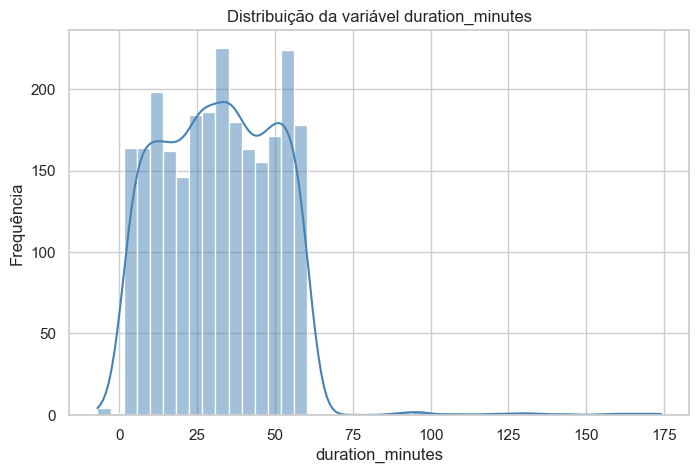


 duration_minutes - Estatísticas:
count    2520.000000
mean       31.942460
std        18.598756
min        -7.000000
25%        17.000000
50%        32.000000
75%        46.000000
max       174.000000
Name: duration_minutes, dtype: float64
Skewness: 0.89
--------------------------------------------------


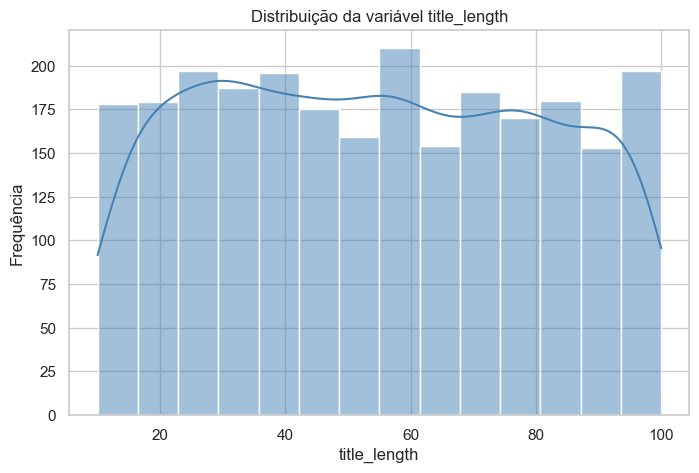


 title_length - Estatísticas:
count    2520.000000
mean       54.436111
std        26.116815
min        10.000000
25%        31.750000
50%        54.000000
75%        77.000000
max       100.000000
Name: title_length, dtype: float64
Skewness: 0.05
--------------------------------------------------


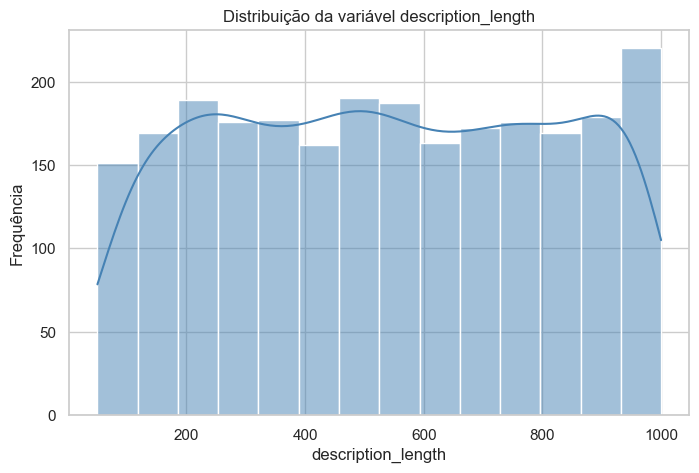


 description_length - Estatísticas:
count    2480.000000
mean      536.062097
std       275.770823
min        50.000000
25%       295.000000
50%       535.000000
75%       775.000000
max      1000.000000
Name: description_length, dtype: float64
Skewness: -0.01
--------------------------------------------------


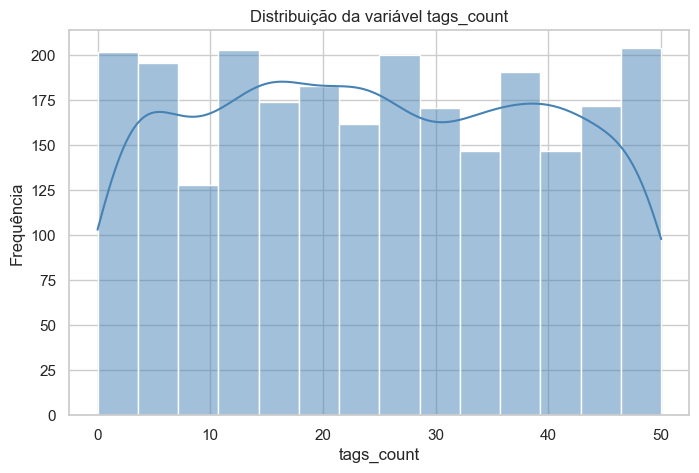


 tags_count - Estatísticas:
count    2480.000000
mean       24.715726
std        14.709814
min         0.000000
25%        12.000000
50%        24.000000
75%        37.250000
max        50.000000
Name: tags_count, dtype: float64
Skewness: 0.03
--------------------------------------------------


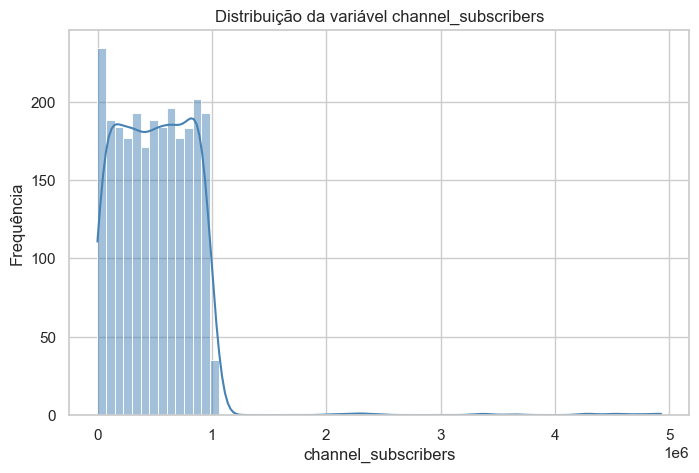


 channel_subscribers - Estatísticas:
count    2.520000e+03
mean     5.119479e+05
std      3.874734e+05
min     -8.440000e+02
25%      2.356905e+05
50%      4.995060e+05
75%      7.558422e+05
max      4.928963e+06
Name: channel_subscribers, dtype: float64
Skewness: 3.91
--------------------------------------------------


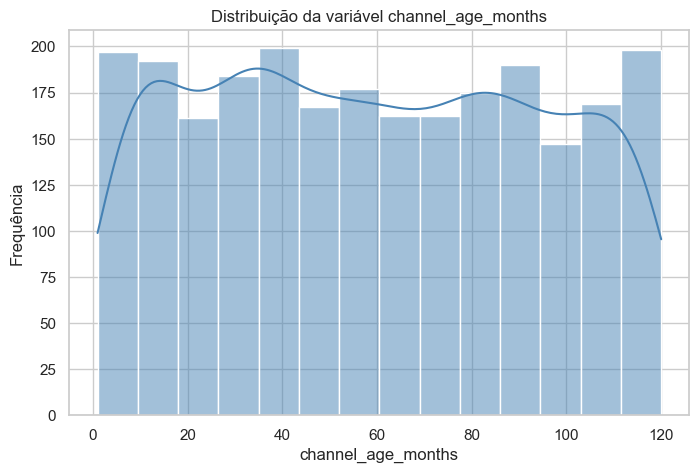


 channel_age_months - Estatísticas:
count    2480.000000
mean       59.449194
std        34.950178
min         1.000000
25%        30.000000
50%        59.000000
75%        89.000000
max       120.000000
Name: channel_age_months, dtype: float64
Skewness: 0.05
--------------------------------------------------


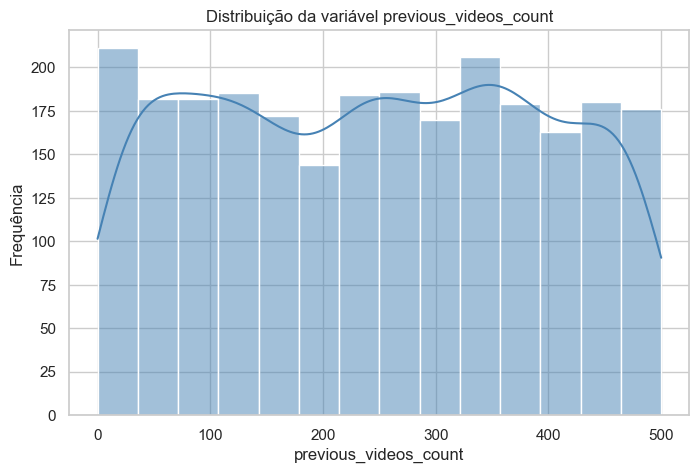


 previous_videos_count - Estatísticas:
count    2520.000000
mean      247.055952
std       146.125772
min         0.000000
25%       117.000000
50%       249.500000
75%       370.000000
max       500.000000
Name: previous_videos_count, dtype: float64
Skewness: 0.00
--------------------------------------------------


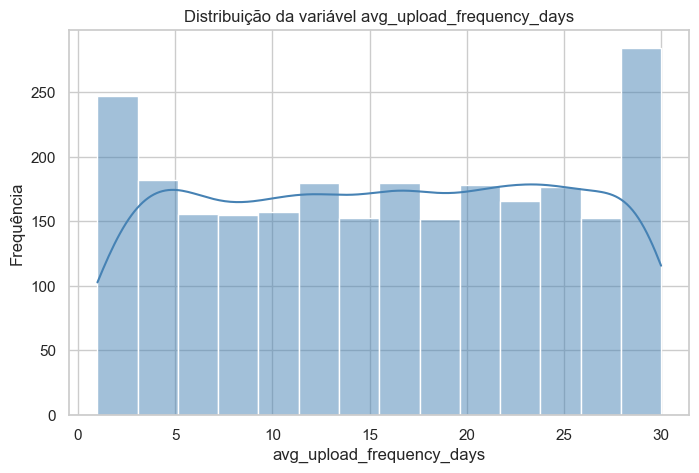


 avg_upload_frequency_days - Estatísticas:
count    2520.000000
mean       15.711905
std         8.723234
min         1.000000
25%         8.000000
50%        16.000000
75%        23.000000
max        30.000000
Name: avg_upload_frequency_days, dtype: float64
Skewness: -0.03
--------------------------------------------------


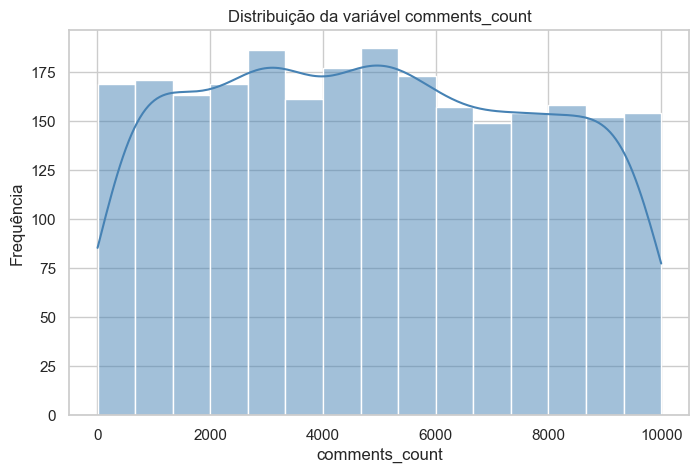


 comments_count - Estatísticas:
count    2480.000000
mean     4888.475000
std      2851.615977
min         6.000000
25%      2502.000000
50%      4845.000000
75%      7317.750000
max      9998.000000
Name: comments_count, dtype: float64
Skewness: 0.06
--------------------------------------------------


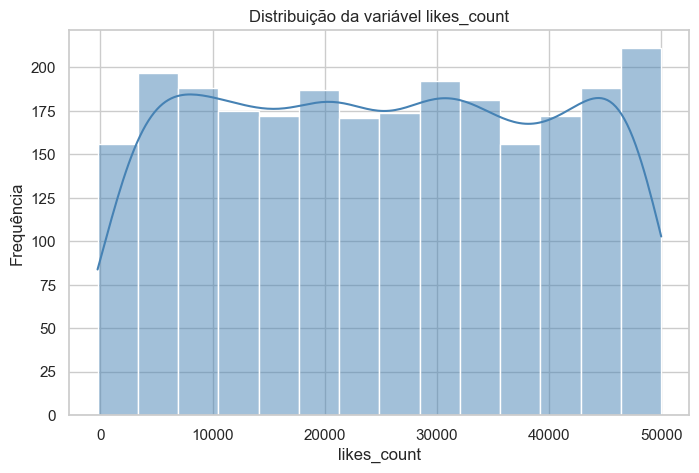


 likes_count - Estatísticas:
count     2520.000000
mean     25141.834127
std      14640.476699
min       -259.000000
25%      12304.250000
50%      25031.500000
75%      37916.500000
max      49985.000000
Name: likes_count, dtype: float64
Skewness: 0.01
--------------------------------------------------


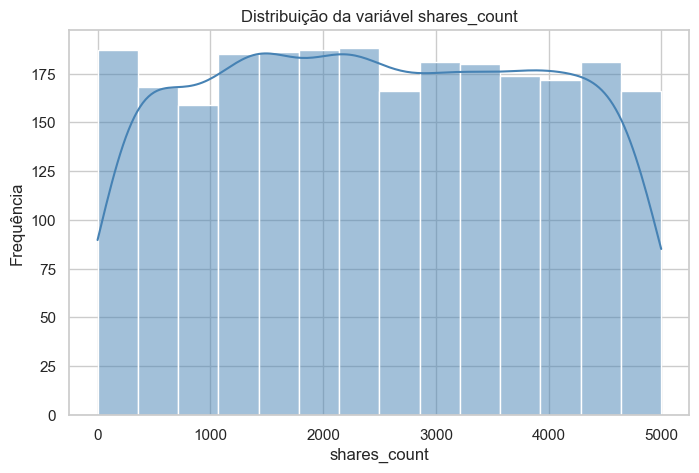


 shares_count - Estatísticas:
count    2480.000000
mean     2487.693952
std      1433.503747
min         0.000000
25%      1277.000000
50%      2469.500000
75%      3736.250000
max      4998.000000
Name: shares_count, dtype: float64
Skewness: 0.01
--------------------------------------------------


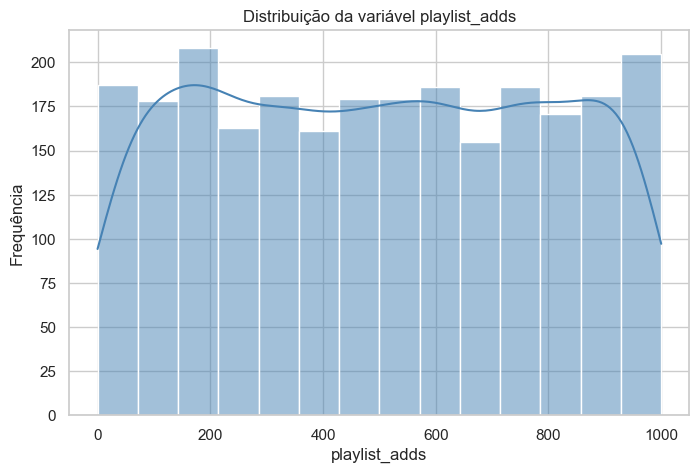


 playlist_adds - Estatísticas:
count    2520.000000
mean      499.431746
std       293.222464
min         0.000000
25%       238.000000
50%       500.000000
75%       755.000000
max      1000.000000
Name: playlist_adds, dtype: float64
Skewness: 0.01
--------------------------------------------------


In [55]:
# Define a variável alvo
target = 'total_views'

# Seleciona apenas as colunas numéricas
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Análise univariada - variáveis numéricas

for col in num_vars:
    if col != target:
        plt.figure(figsize=(8,5))
        sns.histplot(df[col], kde=True, color='steelblue')
        plt.title(f'Distribuição da variável {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.show()
        
        print(f"\n {col} - Estatísticas:")
        print(df[col].describe())
        print(f"Skewness: {df[col].skew():.2f}")
        print("-" * 50)


4-nálise Univariada - Variáveis Categóricas

C:\Users\jkgmb\AppData\Local\Temp\ipykernel_19408\2529383214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='language', data=df, palette='viridis')


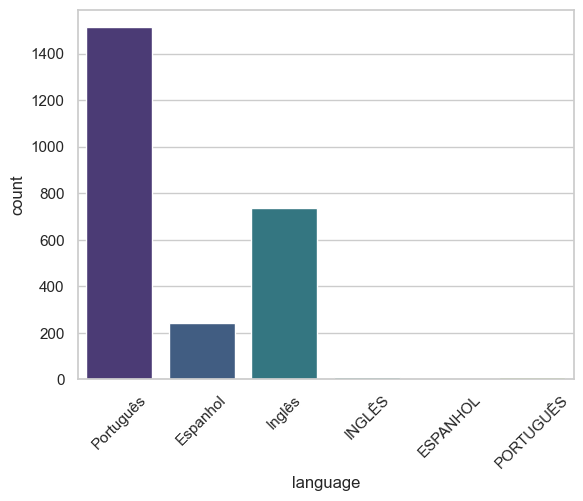

In [56]:
#analise univariada - variaveis categoricas
df['language'].value_counts(normalize=True) * 100
sns.countplot(x='language', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.show()

C:\Users\jkgmb\AppData\Local\Temp\ipykernel_19408\4278858570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='language', data=df, palette='viridis')


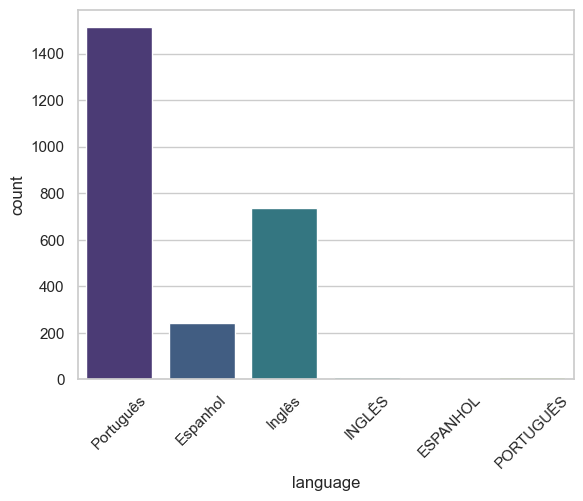

In [57]:
#analise univariada - variaveis categóricas
df['language'].value_counts(normalize=True) * 100
sns.countplot(x='language', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [58]:
# Separar variáveis numéricas e categóricas
num_vars = df.select_dtypes(include=['int64', 'float64']).columns
cat_vars = df.select_dtypes(include=['object', 'bool']).columns

print("\nVariáveis numéricas:", num_vars.tolist())
print("\nVariáveis categóricas:", cat_vars.tolist())


Variáveis numéricas: ['duration_minutes', 'title_length', 'description_length', 'tags_count', 'channel_subscribers', 'channel_age_months', 'previous_videos_count', 'avg_upload_frequency_days', 'comments_count', 'likes_count', 'shares_count', 'playlist_adds', 'total_views']

Variáveis categóricas: ['video_id', 'has_thumbnail_custom', 'video_quality', 'category', 'language', 'has_subtitles', 'promoted', 'upload_time', 'upload_day']


5-Análise de Correlações

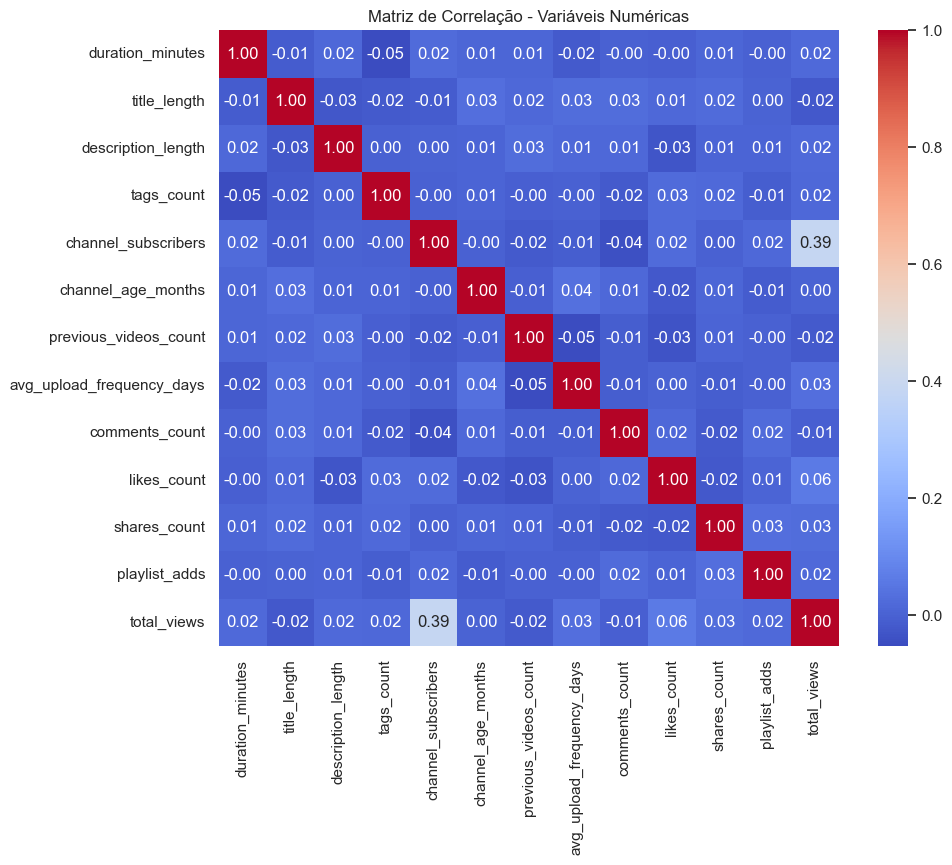

In [59]:
#analise de correlações
corr = df[num_vars].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()


6-Análise Bivariada (Features vs Target)


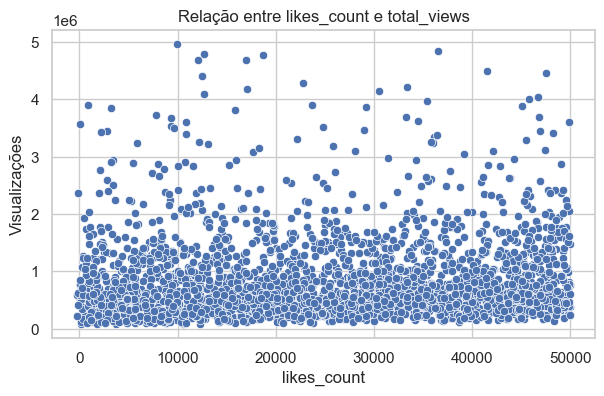

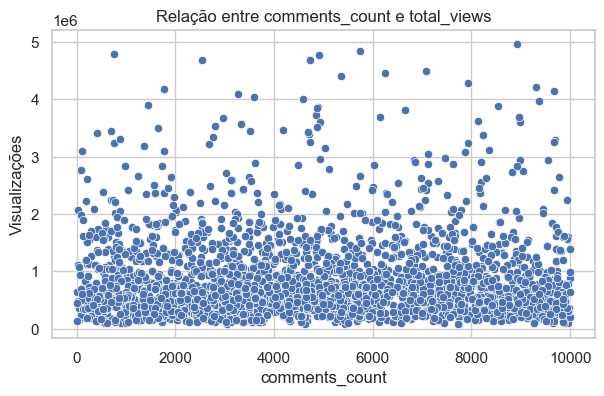

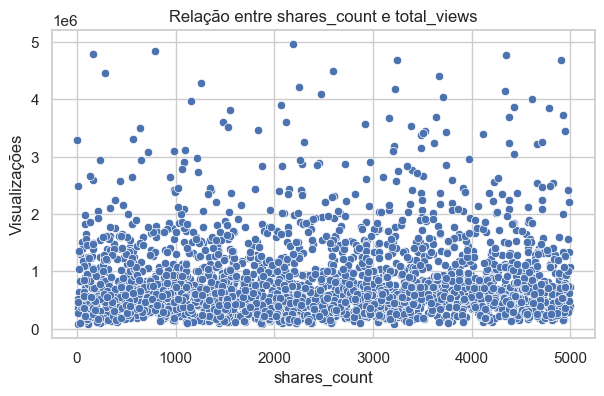

In [60]:
#analise bivariada

# Exemplo com variáveis numéricas
for col in ['likes_count', 'comments_count', 'shares_count']:
    plt.figure(figsize=(7,4))
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f'Relação entre {col} e {target}')
    plt.xlabel(col)
    plt.ylabel('Visualizações')
    plt.show()


C:\Users\jkgmb\AppData\Local\Temp\ipykernel_19408\3465478898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='promoted', y=target, data=df, palette='Set2')


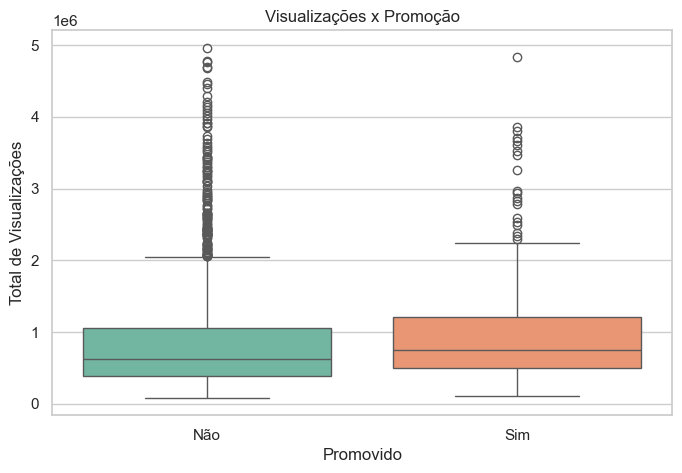

In [61]:
# Exemplo com categóricas
plt.figure(figsize=(8,5))
sns.boxplot(x='promoted', y=target, data=df, palette='Set2')
plt.title('Visualizações x Promoção')
plt.xlabel('Promovido')
plt.ylabel('Total de Visualizações')
plt.show()

7-Identificação de Outliers

In [62]:
#indentificar os outliers
for col in num_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    perc = (len(outliers) / len(df)) * 100
    print(f"{col}: {len(outliers)} outliers ({perc:.2f}%)")

duration_minutes: 15 outliers (0.60%)
title_length: 0 outliers (0.00%)
description_length: 0 outliers (0.00%)
tags_count: 0 outliers (0.00%)
channel_subscribers: 15 outliers (0.60%)
channel_age_months: 0 outliers (0.00%)
previous_videos_count: 0 outliers (0.00%)
avg_upload_frequency_days: 0 outliers (0.00%)
comments_count: 0 outliers (0.00%)
likes_count: 0 outliers (0.00%)
shares_count: 0 outliers (0.00%)
playlist_adds: 0 outliers (0.00%)
total_views: 143 outliers (5.67%)
